### Analisando os casos de chargeback | Perfil transacional

In [5]:
import pandas as pd
import numpy as np
import os, sys
import datetime as dt
from datetime import datetime

sys.path.insert(0, os.path.abspath(".."))
from src import utils as ult
from dotenv import load_dotenv ; load_dotenv()

# Importando plot functions
from src import plot_utils as plu

# Desligando warnings
import warnings
warnings.filterwarnings("ignore")

In [6]:
# Coleta o path_start, basicamente o local da pasta onde estão os dados.
path_start = os.getenv("PATH_START")
df = pd.read_csv(f"{path_start}data\\gold_dados_stone.csv")
df.drop(['Unnamed: 0'],axis=1, inplace=True) ; df.info()

df['CBK'] = np.where(df['CBK'] == 'Sim',1,0)
df['bandeira_visa'] = df.apply(lambda x: 1 if x['Cartão'][:1] == '4' else 0, axis=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11128 entries, 0 to 11127
Data columns (total 31 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Dia                                   11128 non-null  object 
 1   Hora                                  11128 non-null  object 
 2   Valor                                 11128 non-null  float64
 3   Cartão                                11128 non-null  object 
 4   CBK                                   11128 non-null  object 
 5   dia_hora                              11128 non-null  object 
 6   hour                                  11128 non-null  int64  
 7   shift                                 11128 non-null  int64  
 8   week_number_month                     11128 non-null  int64  
 9   weekday                               11128 non-null  object 
 10  weekday_num                           11128 non-null  int64  
 11  mean_shift_cust

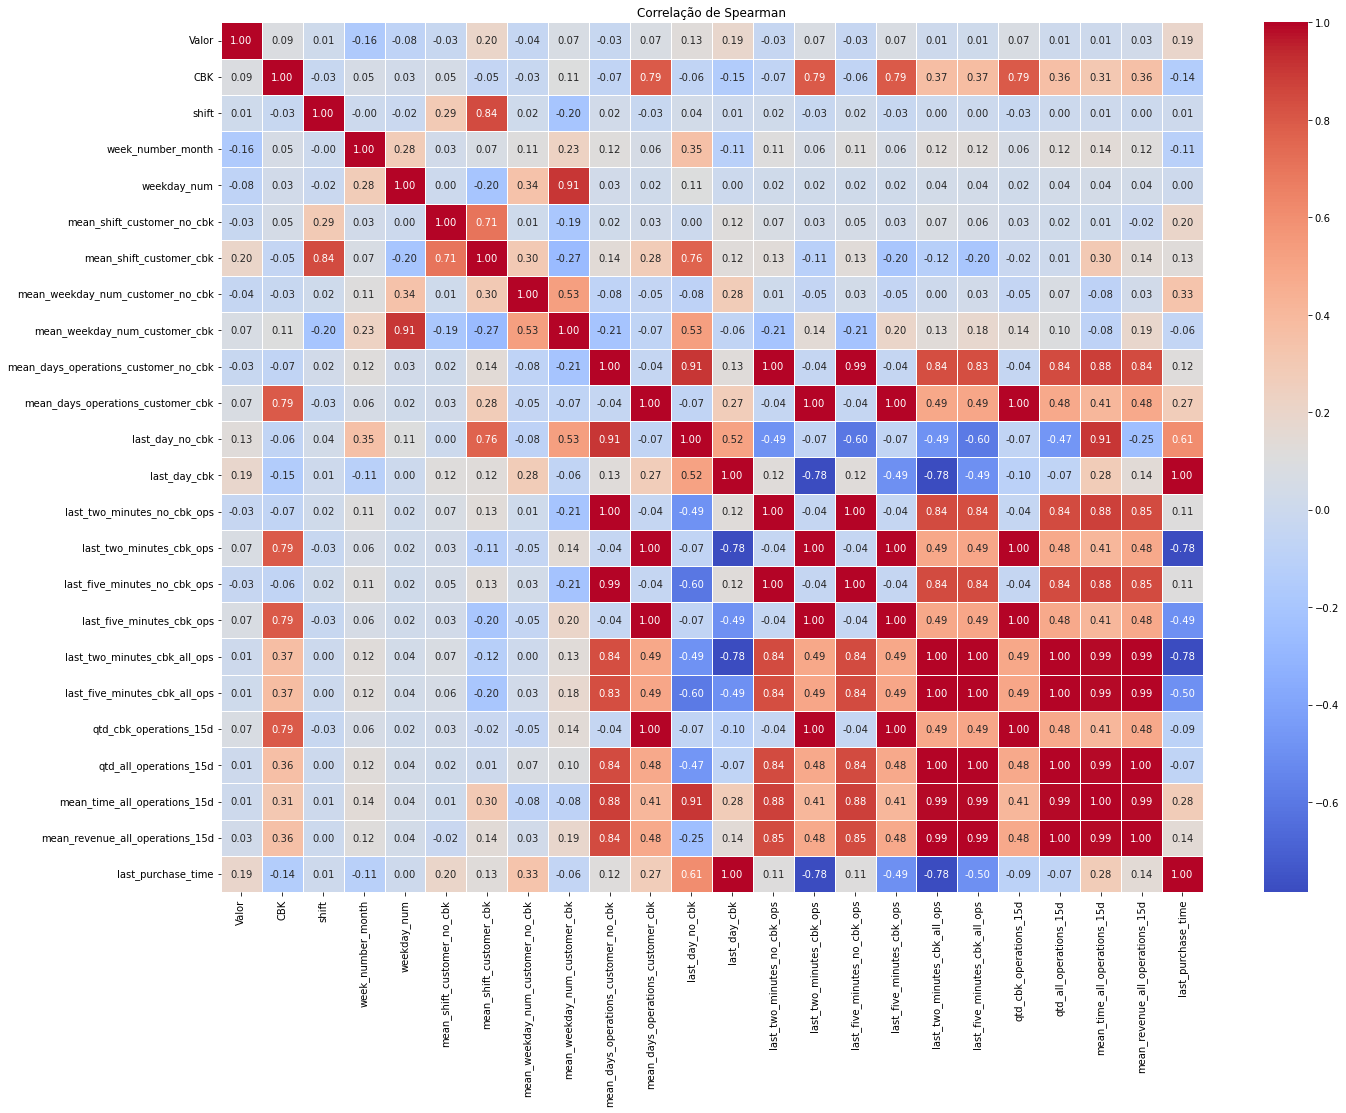

In [3]:
plu.corrplot(df=df[['Valor','CBK','shift',
    'week_number_month', 'weekday', 'weekday_num',
    'mean_shift_customer_no_cbk', 'mean_shift_customer_cbk',
    'mean_weekday_num_customer_no_cbk', 'mean_weekday_num_customer_cbk',
    'mean_days_operations_customer_no_cbk',
    'mean_days_operations_customer_cbk', 'last_day_no_cbk', 'last_day_cbk',
    'last_two_minutes_no_cbk_ops', 'last_two_minutes_cbk_ops',
    'last_five_minutes_no_cbk_ops', 'last_five_minutes_cbk_ops',
    'last_two_minutes_cbk_all_ops', 'last_five_minutes_cbk_all_ops',
    'qtd_cbk_operations_15d', 'qtd_all_operations_15d',
    'mean_time_all_operations_15d', 'mean_revenue_all_operations_15d',
    'last_purchase_time']])

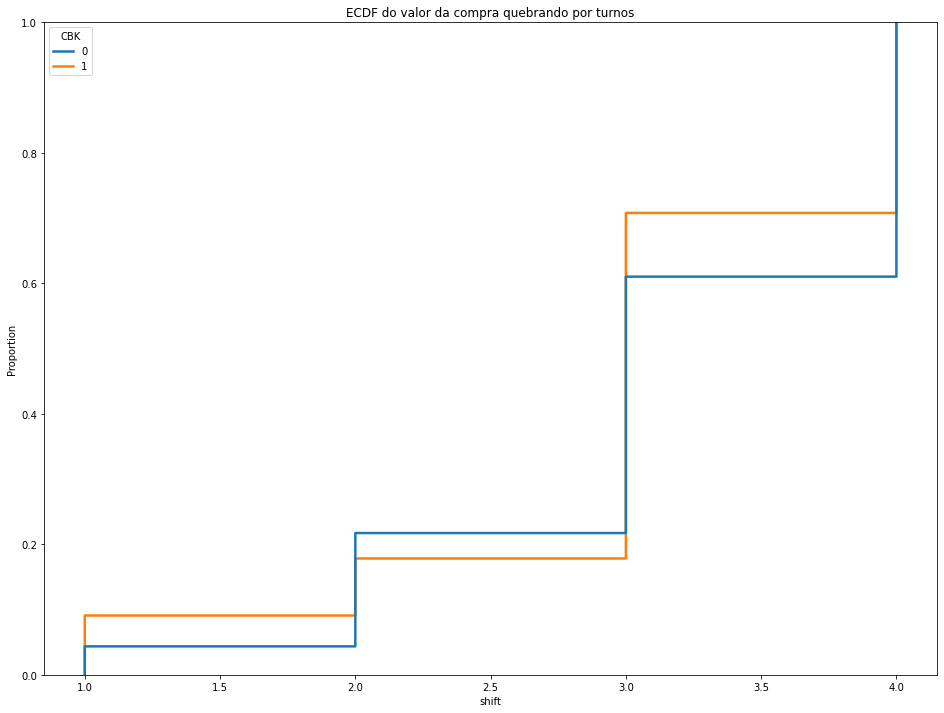

In [4]:
plu.plot_multiple_ecdf(df=df, plotting_var='shift', hue_var='CBK', title='ECDF do valor da compra quebrando por turnos')

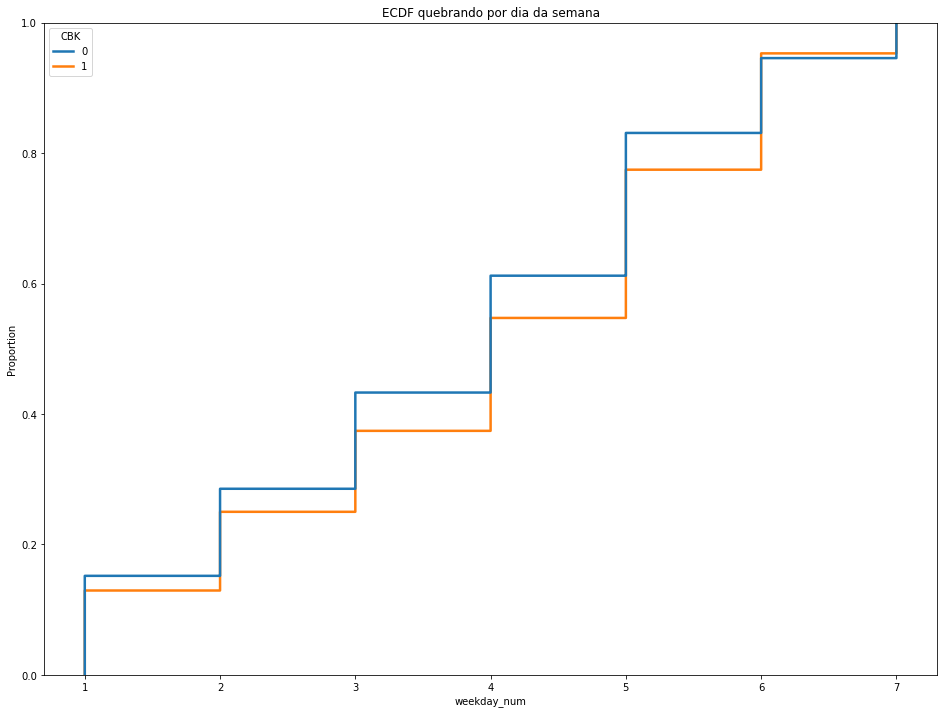

In [5]:
plu.plot_multiple_ecdf(df=df, plotting_var='weekday_num', hue_var='CBK', title='ECDF quebrando por dia da semana')

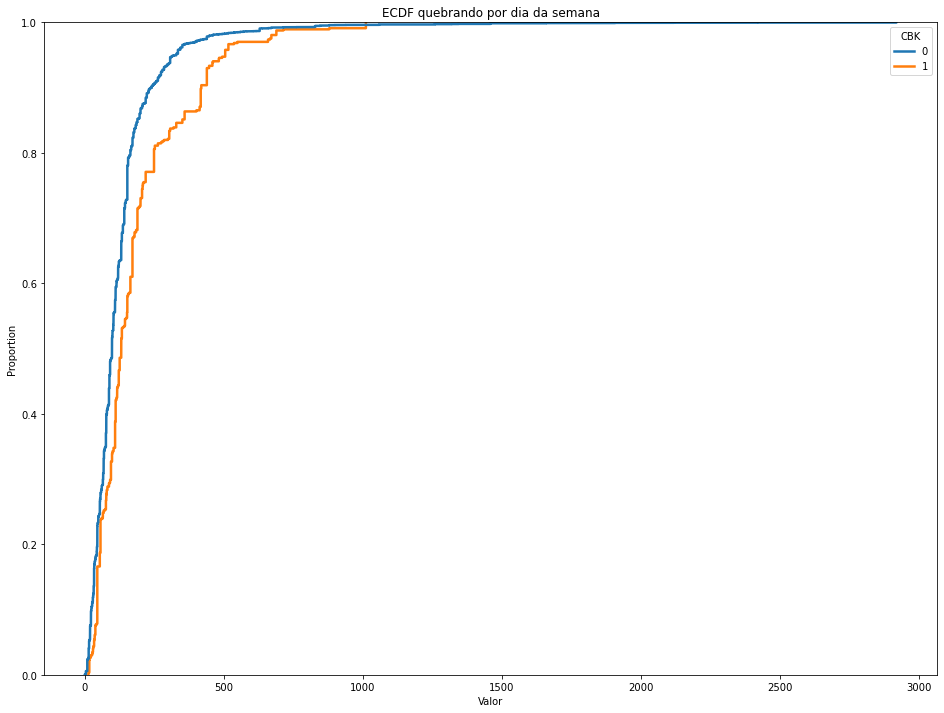

In [6]:
plu.plot_multiple_ecdf(df=df, plotting_var='Valor', hue_var='CBK', title='ECDF quebrando por dia da semana')

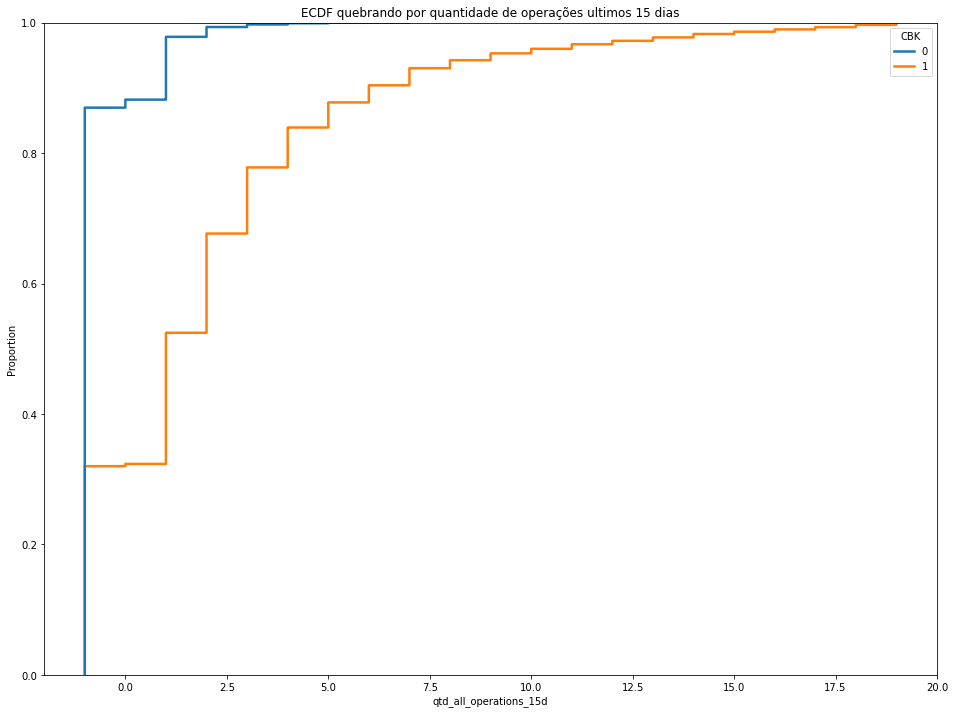

In [7]:
plu.plot_multiple_ecdf(df=df, 
                       plotting_var='qtd_all_operations_15d', 
                       hue_var='CBK', 
                       title='ECDF quebrando por quantidade de operações ultimos 15 dias')

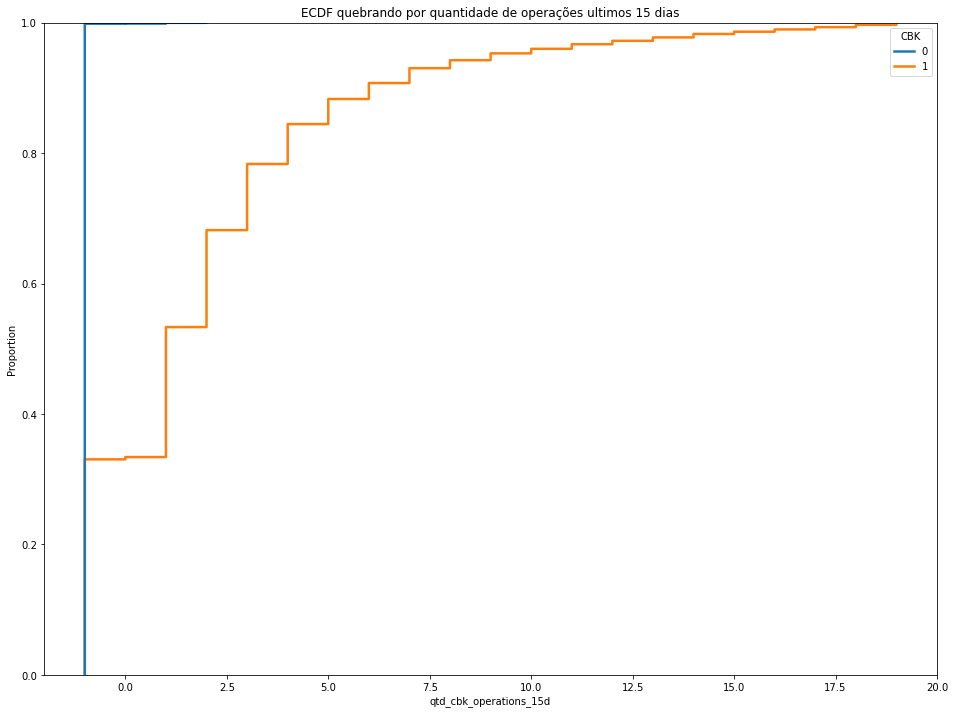

In [8]:
plu.plot_multiple_ecdf(df=df, 
                       plotting_var='qtd_cbk_operations_15d', 
                       hue_var='CBK', 
                       title='ECDF quebrando por quantidade de operações ultimos 15 dias')

In [20]:
df[(df['CBK'] == 0) & (df['qtd_cbk_operations_15d'] > -1)].shape

(18, 30)

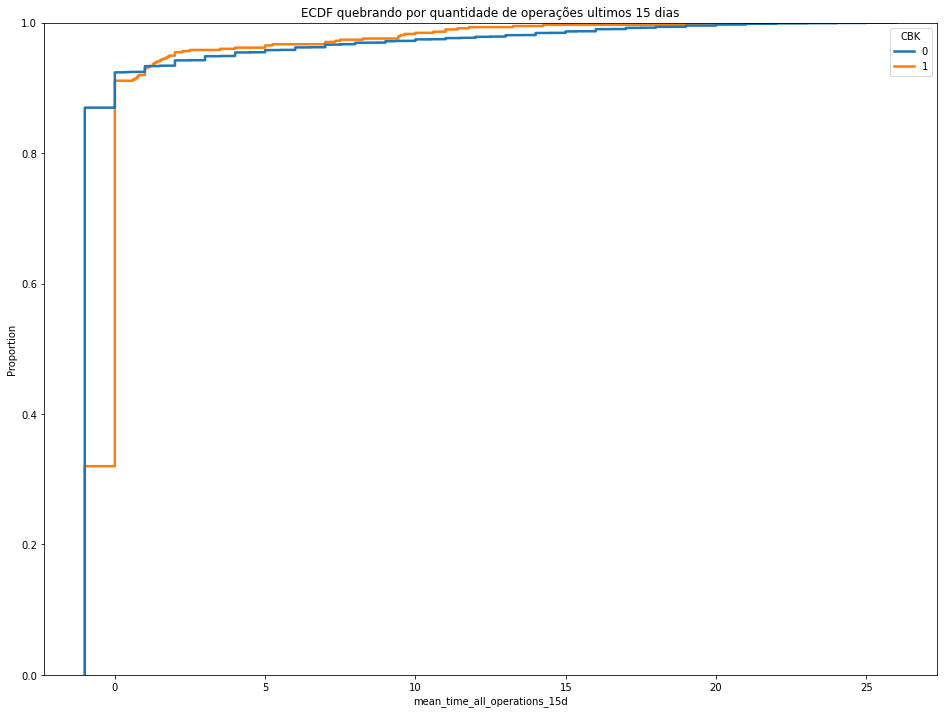

In [9]:
plu.plot_multiple_ecdf(df=df, 
                       plotting_var='mean_time_all_operations_15d', 
                       hue_var='CBK', 
                       title='ECDF quebrando por quantidade de operações ultimos 15 dias')

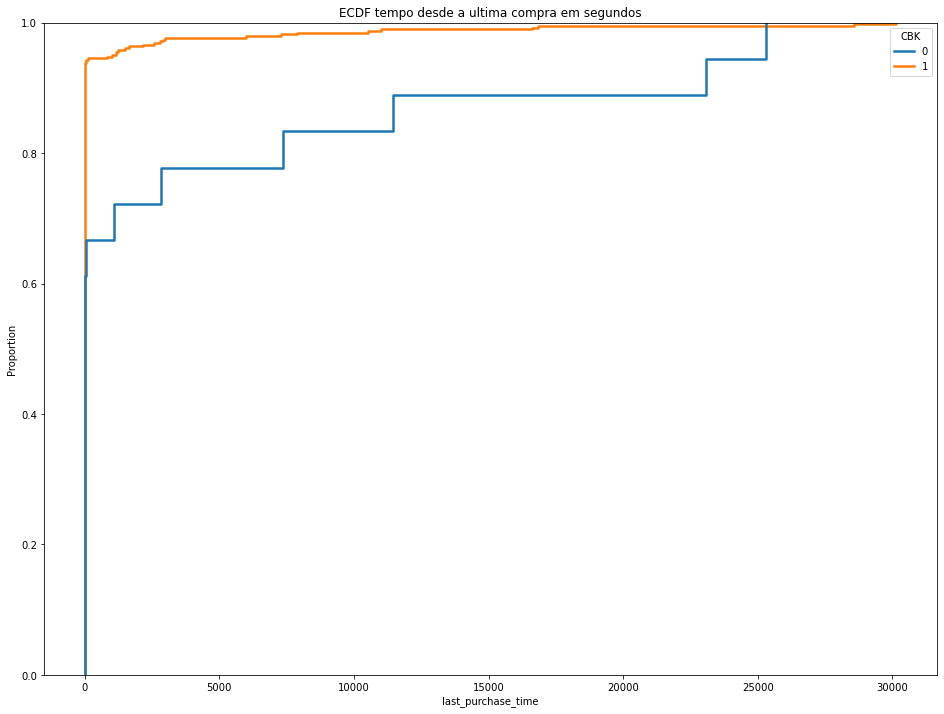

In [12]:
plu.plot_multiple_ecdf(df=df, 
                       plotting_var='last_purchase_time', 
                       hue_var='CBK', 
                       title='ECDF tempo desde a ultima compra em segundos')

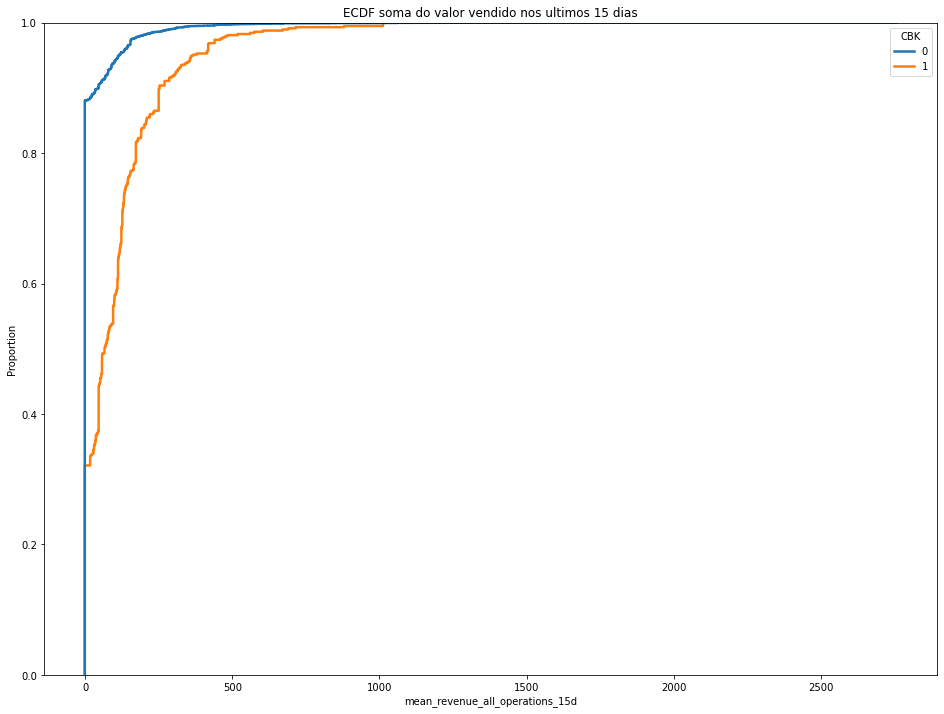

In [5]:
plu.plot_multiple_ecdf(df=df, 
                       plotting_var='mean_revenue_all_operations_15d', 
                       hue_var='CBK', 
                       title='ECDF media de valor vendido nos ultimos 15 dias')

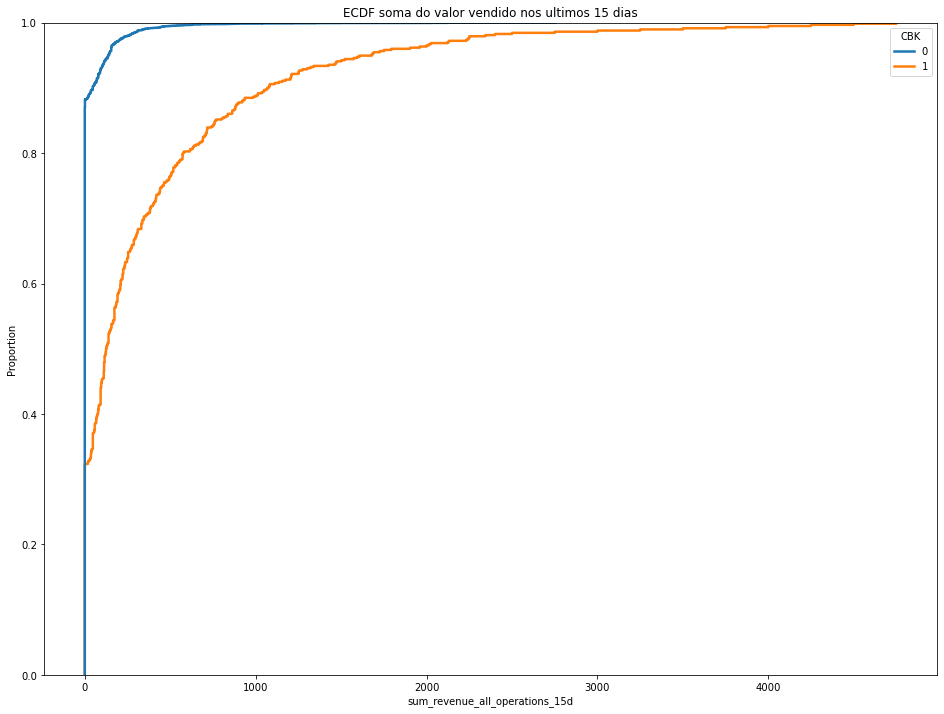

In [ ]:
plu.plot_multiple_ecdf(df=df, 
                       plotting_var='sum_revenue_all_operations_15d', 
                       hue_var='CBK', 
                       title='Soma da venda de produtos dos ultimos 15 dias')

# Analisando as variáveis do plot de correlação

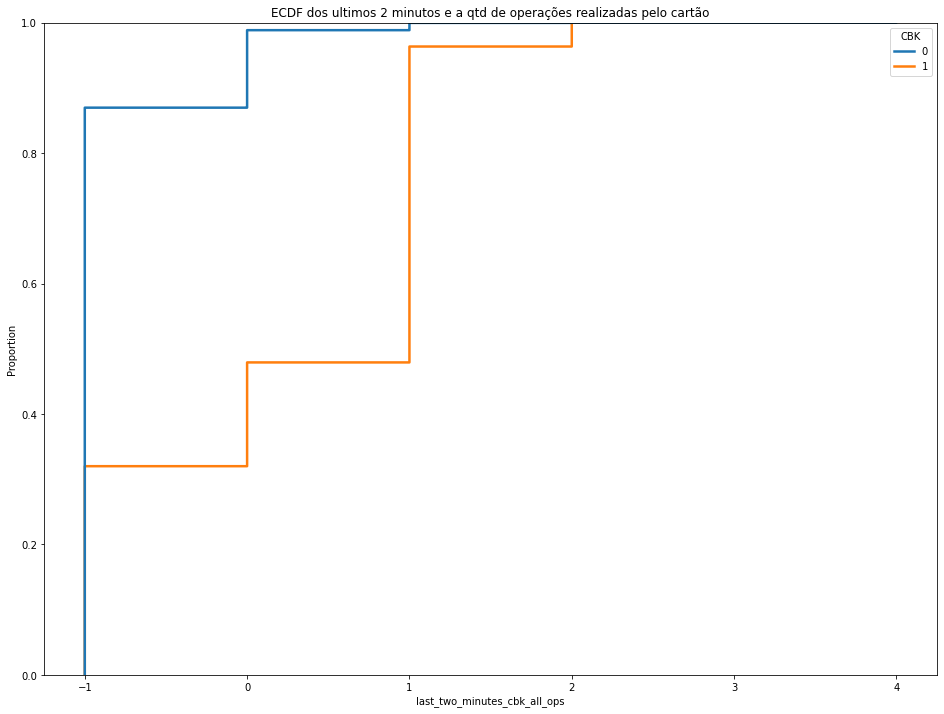

In [11]:
plu.plot_multiple_ecdf(df=df, 
                       plotting_var='last_two_minutes_cbk_all_ops', 
                       hue_var='CBK', 
                       title='ECDF dos ultimos 2 minutos e a qtd de operações realizadas pelo cartão')

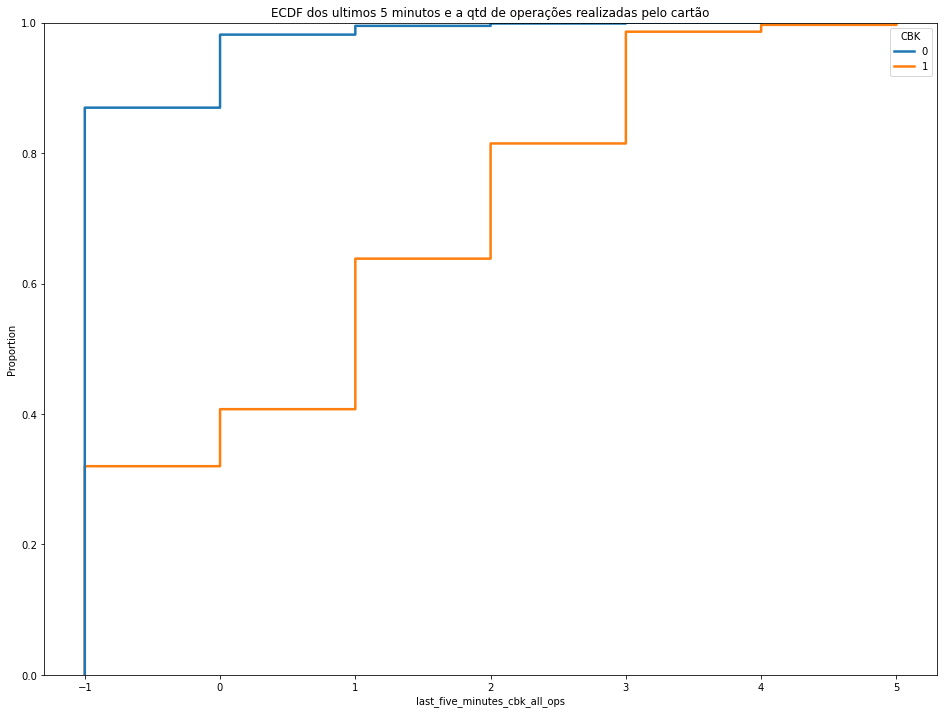

In [10]:
plu.plot_multiple_ecdf(df=df, 
                       plotting_var='last_five_minutes_cbk_all_ops', 
                       hue_var='CBK', 
                       title='ECDF dos ultimos 5 minutos e a qtd de operações realizadas pelo cartão')

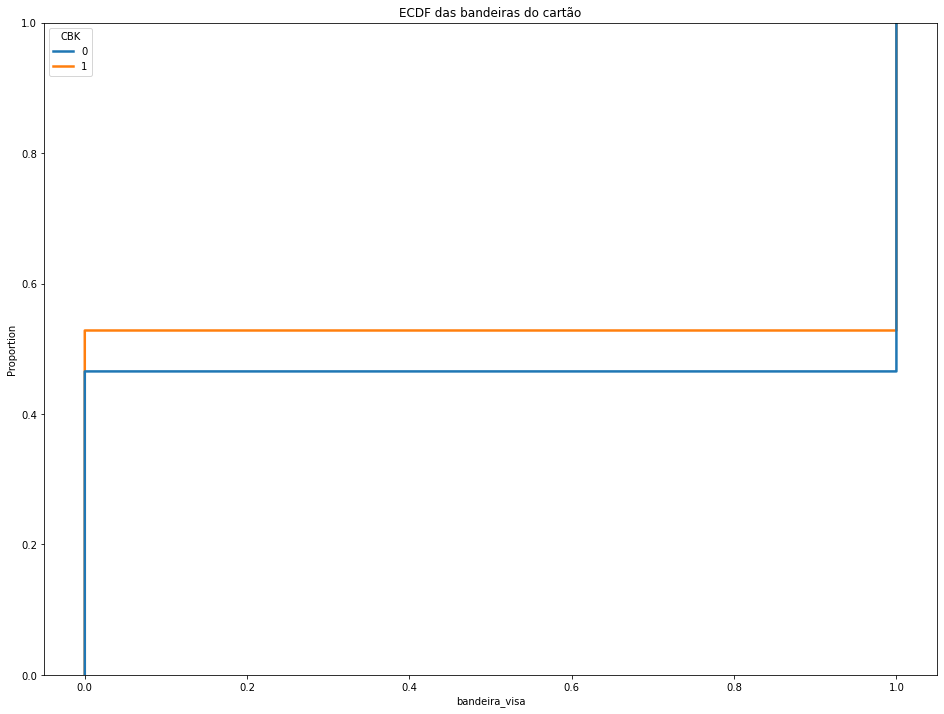

In [9]:
plu.plot_multiple_ecdf(df=df, 
                       plotting_var='bandeira_visa', 
                       hue_var='CBK', 
                       title='ECDF das bandeiras do cartão')

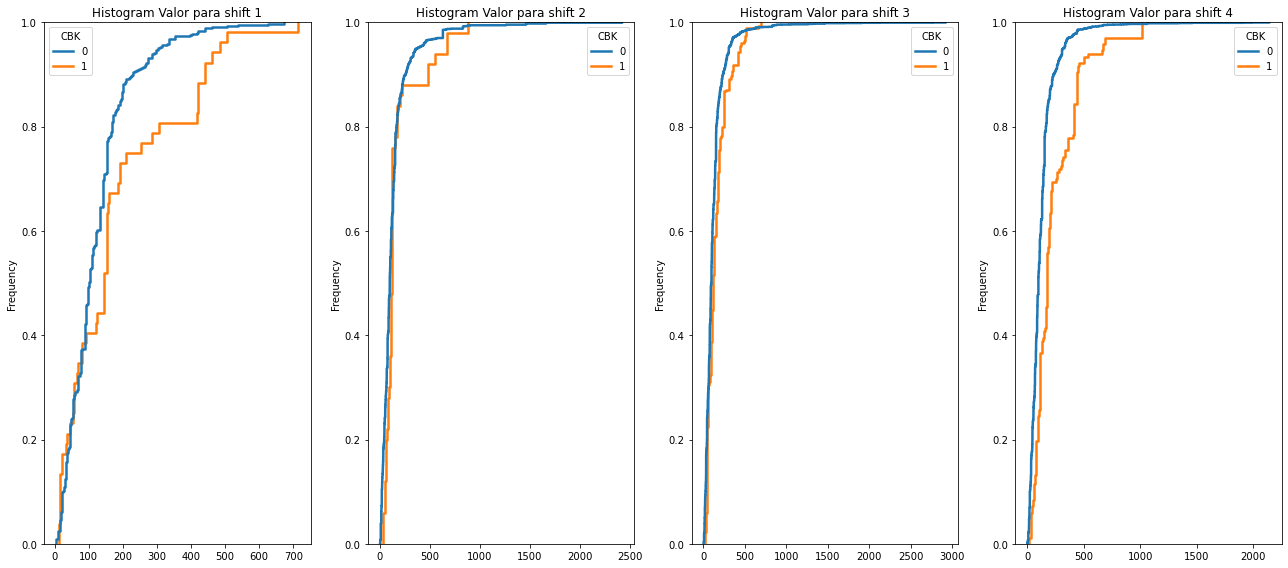

In [4]:
plu.plot_shift(df=df, col='Valor', hue='CBK')

# Insights

* Cartões que já tiveram chargeback é mais raro possuir operações que o cliente n alavanca CBK
* Quanto maior for a soma de venda dos ultimos 15 dias, maior a chance de CBK
* Quanto maior a quantidade de operações em um intervalo de 5 minutos, maior a chance de CBK
* Quanto menor o tempo da ultima operação, maior a chance de CBK
* Valores maiores de venda no período da madrugada acaba tendo uma chance maior de CBK